In [1]:
# Please execute the main EDA and data cleaning file before running this code.

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
import math

import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
pd.set_option('display.float_format', '{:.5f}'.format)

### Read the dataframes for different product categories

In [5]:
# Reading the file

df_ga = pd.read_csv('df_ga_weekly.csv', na_values=['', ' '])

In [6]:
print(df_ga.shape)

(53, 24)


## Building model for Gaming Accessory

In [7]:
df_ga.describe()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,...,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,53.00000,2886505.76134,3542.09131,5.56453,1589.67206,2.45429,826.34105,43.04073,0.43396,0.43396,...,1514711.96540,36535776.13666,11579204.58429,17207951.54621,881132.07547,9060857.56324,49.03774,1159.51482,12.24154,2.59934
std,15.44345,1330155.38567,1850.85579,0.64890,366.52000,0.26627,167.88736,4.85227,0.50036,0.50036,...,1995229.13090,18731683.27948,5713889.68239,16631006.41467,1728397.48869,18128218.21645,4.03713,77.65472,9.03152,3.22523
min,27.00000,359.00000,1.00000,2.81250,362.00000,1.50000,195.50000,25.28299,0.00000,0.00000,...,14.28255,291841.88649,166383.18131,4980687.97045,0.00000,0.00000,44.00000,1015.00000,-7.26667,0.00000
25%,40.00000,2426174.30671,2655.59133,5.46657,1435.75978,2.35887,746.94503,40.52548,0.00000,0.00000,...,105188.12549,28543564.29316,9000468.54213,9724368.78533,0.00000,0.00000,46.00000,1101.00000,5.72000,0.28000
50%,53.00000,2944386.82939,3580.23268,5.75061,1579.02704,2.48653,834.54713,43.65736,0.00000,0.00000,...,921912.13177,42545536.54622,14039892.47312,11732674.36225,0.00000,0.00000,49.00000,1194.00000,12.40000,1.10000
75%,66.00000,3407151.64697,4401.55094,5.88483,1705.75388,2.56241,928.62412,46.28044,1.00000,1.00000,...,2032258.06452,50814931.91195,15415666.30921,15603225.80645,1122580.64516,11260967.74194,50.00000,1222.00000,20.55000,4.20000
max,79.00000,7137883.92199,11128.13263,6.38456,2728.27710,3.25000,1219.20705,53.49949,1.00000,1.00000,...,7776942.99897,55033046.50298,16641935.48387,72093251.50133,6096774.19355,61170967.74194,59.00000,1242.00000,24.56667,12.80000


In [8]:
df_ga.columns

Index(['week_number', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'List_Price', 'discount', 'pay_day_flag',
       'sale_day_flag', 'prepaid_frac', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [9]:
# taking all the numeric columns for correlation
corr_variables = [ 'gmv', 'units', 'sla', 'product_mrp','pay_day_flag', 'sale_day_flag',
      'product_procurement_sla', 'List_Price', 'discount', 'TV', 'Digital', 'Sponsorship', 
      'Content Marketing','Online marketing', 'Affiliates', 'SEM', 'Radio',
      'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

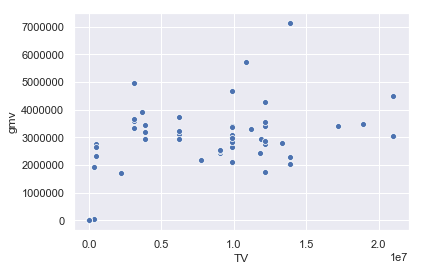

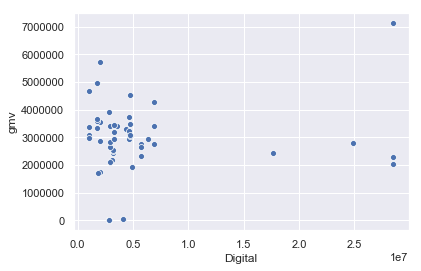

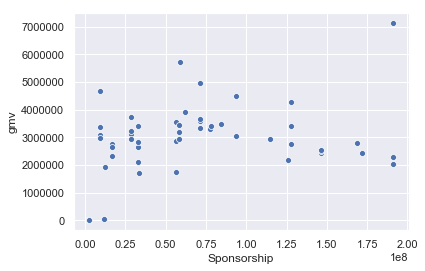

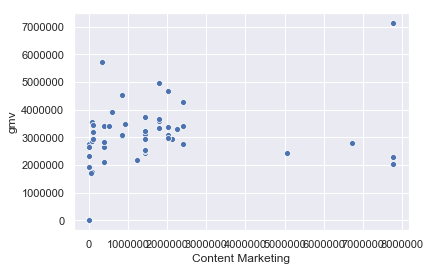

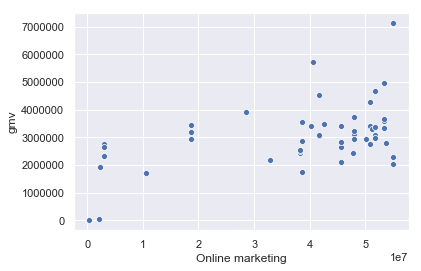

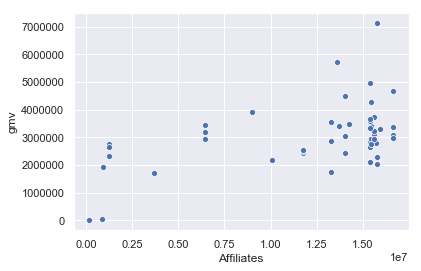

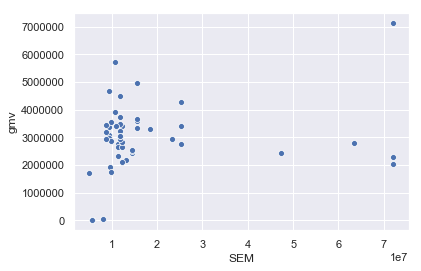

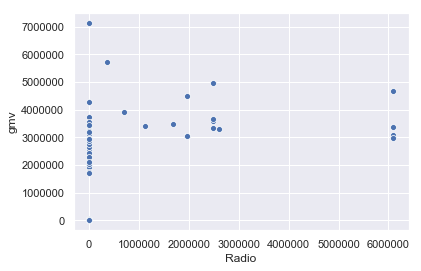

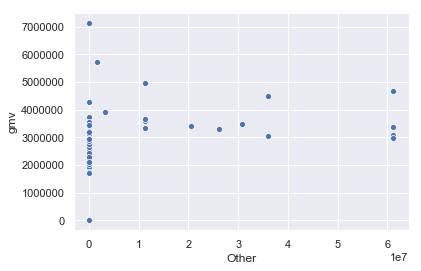

In [10]:
# Plotting scatter plots for adspends vs GMV
cols = ['TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio','Other']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ga)
    plt.show()

In [11]:
#Creating dataframe with the numeric variables
df_ga_corr = df_ga[corr_variables]

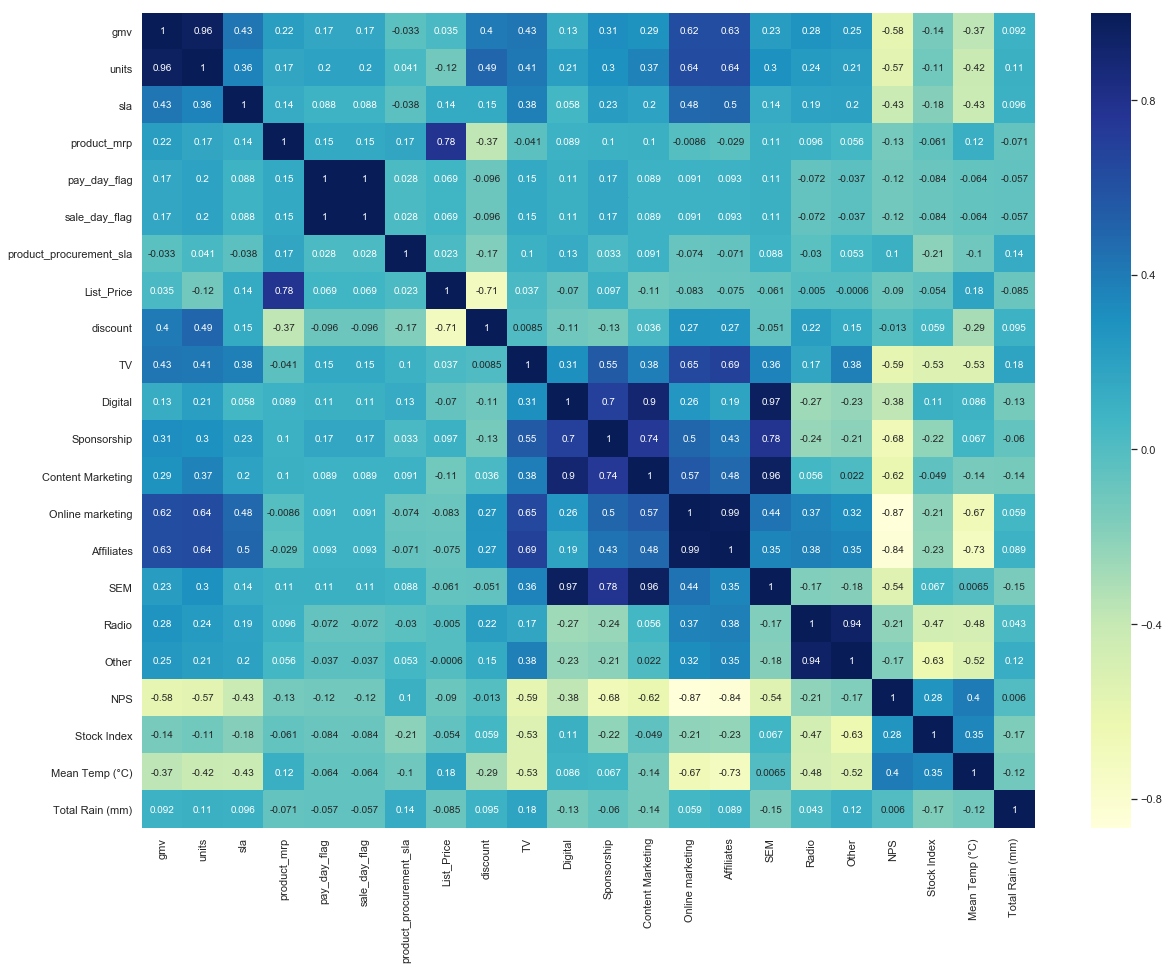

In [12]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,15)) 
sns.heatmap(df_ga_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [13]:
# Following are highly corelated 
# 1. gmv and units. So, we would drop units.
# 2. Digital is highly corelated to content marketing, SEM . So, we would drop content marketing & SEM.
# 3. Affiliate marketing is highly corelated with online marketing. So, we would drop affiliate marketing.
# 4. Radio and Other is highly corelated. So, we would drop other.
# 5. pay_day_flag and special_sale_day flag
# 6. NPS has high negative corelation with online marketing.

df_ga_corr.drop(['units','pay_day_flag', 'Content Marketing',  'SEM', 'Affiliates', 'Other', 'NPS'], axis = 1, inplace = True)
df_ga.drop(['units', 'pay_day_flag', 'Content Marketing',  'SEM', 'Affiliates', 'Other', 'NPS'], axis = 1, inplace = True)

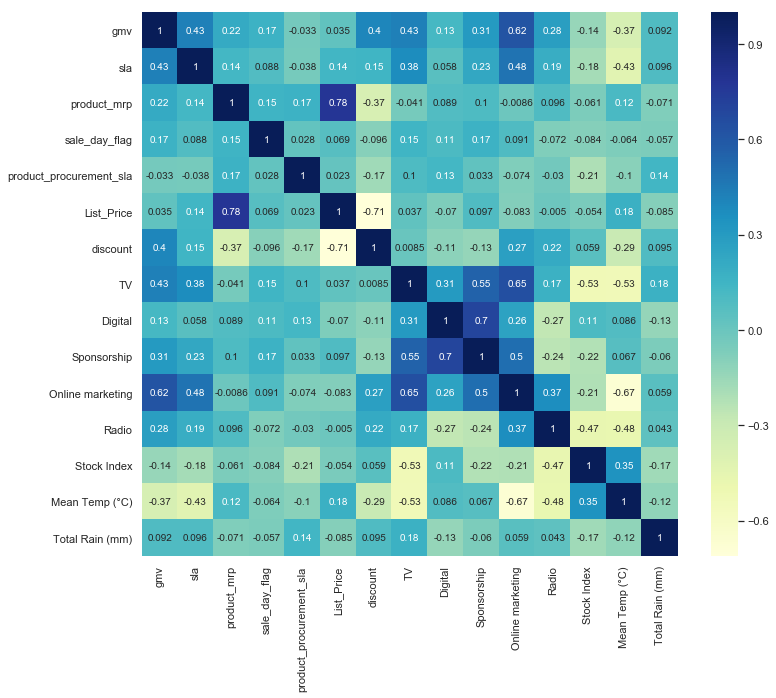

In [14]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(12,10)) 
sns.heatmap(df_ga_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
# Copying the dataframe to be used for multiplicative model
df_ga_mult = df_ga.copy()

In [16]:
### Dropping week_number feature
df_ga.drop(['week_number'], axis = 1, inplace = True)

In [17]:
df_ga.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'List_Price',
       'discount', 'sale_day_flag', 'prepaid_frac', 'TV', 'Digital',
       'Sponsorship', 'Online marketing', 'Radio', 'Stock Index',
       'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [18]:
# Scaling the numeric columns and removing flag variable
numeric_variables_ga = [ 'gmv', 'sla', 'product_mrp', 'product_procurement_sla',
                        'List_Price', 'discount', 'prepaid_frac',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

In [19]:
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
df_ga[numeric_variables_ga] = scaler.fit_transform(df_ga[numeric_variables_ga])

In [20]:
# Splitting the data in test and train
y = df_ga.pop('gmv')
X = df_ga

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [21]:
y_train_ga.shape

(50,)

### Building first linear model using RFE

In [22]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ga, y_train_ga)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False False False  True  True  True False  True False False  True False
 False False False]
[11  9  3  1  1  1  5  1  7  8  1  4 10  2  6]


In [23]:
# RFE with 5 features
lm = LinearRegression()
rfe1 = RFE(lm, 5)

# Fit with 5 features
rfe1.fit(X_train_ga, y_train_ga)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False  True  True  True False  True False False  True False
 False False False]
[11  9  3  1  1  1  5  1  7  8  1  4 10  2  6]


In [24]:
list(zip(X_train_ga.columns,rfe1.support_,rfe1.ranking_))

[('sla', False, 11),
 ('product_mrp', False, 9),
 ('product_procurement_sla', False, 3),
 ('List_Price', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', True, 1),
 ('prepaid_frac', False, 5),
 ('TV', True, 1),
 ('Digital', False, 7),
 ('Sponsorship', False, 8),
 ('Online marketing', True, 1),
 ('Radio', False, 4),
 ('Stock Index', False, 10),
 ('Mean Temp (°C)', False, 2),
 ('Total Rain (mm)', False, 6)]

In [25]:
# Subset the features selected by rfe1
col = X_train_ga.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe1 = X_train_ga[col]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [26]:
# Fitting the model with 10 variables
lm = sm.OLS(y_train_ga, X_train_rfe1).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     16.72
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.11e-09
Time:                        14:29:13   Log-Likelihood:                -45.607
No. Observations:                  50   AIC:                             103.2
Df Residuals:                      44   BIC:                             114.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1601      0.124  

In [27]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,discount,2.28000
1,List_Price,2.10000
5,Online marketing,1.99000
0,const,1.87000
4,TV,1.86000
3,sale_day_flag,1.03000


In [28]:
# Dropping TV as it has high p-value
col = col.drop('TV', 1)

In [29]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ga[col])

lm = sm.OLS(y_train_ga, X_lm2).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     20.52
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.11e-09
Time:                        14:29:13   Log-Likelihood:                -46.270
No. Observations:                  50   AIC:                             102.5
Df Residuals:                      45   BIC:                             112.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1607      0.124  

In [30]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,discount,2.22000
1,List_Price,2.10000
0,const,1.87000
4,Online marketing,1.09000
3,sale_day_flag,1.02000


In [31]:
# Dropping sale_day_flag as it has high p-value
col = col.drop('sale_day_flag', 1)

In [32]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ga[col])

lm = sm.OLS(y_train_ga, X_lm3).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     25.03
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.41e-10
Time:                        14:29:13   Log-Likelihood:                -48.026
No. Observations:                  50   AIC:                             104.1
Df Residuals:                      46   BIC:                             111.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0071      0.093  

In [33]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,discount,2.20000
1,List_Price,2.10000
3,Online marketing,1.08000
0,const,1.00000


In [34]:
# Predictions

X_test_new = X_test_ga[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred - y_test_ga))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ga)**2)

print(RMSE)
print(MSE)

0.8494131161689763
0.7215026419198908


#### This is linear model. This is having R-Square of .620 and Adj. R-Square .595, RMSE = .849 and MSE = 0.722.

### Multiplicative Model

In [35]:
# Analysing the dataframe created above

df_ga_mult.describe()

,week_number,gmv,sla,product_mrp,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,53.00000,2886505.76134,5.56453,1589.67206,2.45429,826.34105,43.04073,0.43396,0.25233,8371327.49215,5596269.33415,68937314.84944,36535776.13666,881132.07547,1159.51482,12.24154,2.59934
std,15.44345,1330155.38567,0.64890,366.52000,0.26627,167.88736,4.85227,0.50036,0.22325,5836496.21220,6825405.91405,55802763.89773,18731683.27948,1728397.48869,77.65472,9.03152,3.22523
min,27.00000,359.00000,2.81250,362.00000,1.50000,195.50000,25.28299,0.00000,0.00000,14537.58453,1029677.41935,2401071.71178,291841.88649,0.00000,1015.00000,-7.26667,0.00000
25%,40.00000,2426174.30671,5.46657,1435.75978,2.35887,746.94503,40.52548,0.00000,0.16901,3093548.38710,2864708.37116,28303064.53455,28543564.29316,0.00000,1101.00000,5.72000,0.28000
50%,53.00000,2944386.82939,5.75061,1579.02704,2.48653,834.54713,43.65736,0.00000,0.18376,9848136.05973,3315107.84865,58446595.13816,42545536.54622,0.00000,1194.00000,12.40000,1.10000
75%,66.00000,3407151.64697,5.88483,1705.75388,2.56241,928.62412,46.28044,1.00000,0.21484,12145457.92877,4741935.48387,93912903.22581,50814931.91195,1122580.64516,1222.00000,20.55000,4.20000
max,79.00000,7137883.92199,6.38456,2728.27710,3.25000,1219.20705,53.49949,1.00000,1.00000,21000000.00000,28502373.66620,191196038.93030,55033046.50298,6096774.19355,1242.00000,24.56667,12.80000


In [36]:
# Dropping week_number
df_ga_mult = df_ga_mult.drop(['week_number'], axis = 1)

In [37]:
df_ga_mult.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'List_Price',
       'discount', 'sale_day_flag', 'prepaid_frac', 'TV', 'Digital',
       'Sponsorship', 'Online marketing', 'Radio', 'Stock Index',
       'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [38]:
# Scaling for all columns except the flag column
numeric_variables_ga_mult = ['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'List_Price',
       'discount' ,'prepaid_frac' ,'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

In [39]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ga_mult[numeric_variables_ga_mult] = scaler.fit_transform(df_ga_mult[numeric_variables_ga_mult])

In [40]:
df_ga_mult.shape

(53, 16)

In [41]:
# Taking natural log

for col in list(df_ga_mult.columns):
    df_ga_mult[col] = np.log(df_ga_mult[col])

In [42]:
df_ga_mult.describe()

,gmv,sla,product_mrp,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.07920,-0.29705,-0.79015,-0.71176,-0.61864,-0.61582,nan,-1.77782,-1.91922,-2.70613,-1.98634,-0.66146,nan,-0.97060,-0.89659,-3.82241
50%,-0.88559,-0.19538,-0.66491,-0.57318,-0.47121,-0.42895,nan,-1.69412,-0.75802,-2.48664,-1.21450,-0.25892,nan,-0.23756,-0.48159,-2.45413
75%,-0.73959,-0.15071,-0.56585,-0.49908,-0.33387,-0.29551,0.00000,-1.53786,-0.54807,-2.00155,-0.72419,-0.08019,-1.69213,-0.09223,-0.13488,-1.11436
max,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000


In [43]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ga_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ga_mult.fillna(0,inplace=True)

In [44]:
df_ga_mult.describe()

,gmv,sla,product_mrp,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,-1.39201,-0.28021,-0.65950,-0.60339,-0.48626,-0.46247,0.00000,-1.40806,-1.10516,-2.07789,-1.23771,-0.52891,-0.29830,-0.55771,-0.58759,-1.45435
std,2.13009,0.40129,0.29266,0.25157,0.27725,0.24527,0.00000,0.59959,1.09061,1.07980,1.00535,0.91598,0.62491,0.73994,0.56286,1.29183
min,-12.31514,-2.94712,-1.94899,-1.26561,-1.83437,-0.98922,0.00000,-1.89857,-4.14414,-3.65705,-3.28299,-3.38801,-2.84385,-2.28946,-2.19827,-4.44657
25%,-1.06984,-0.29701,-0.78186,-0.71111,-0.59075,-0.61356,0.00000,-1.75254,-1.69183,-2.69461,-1.81747,-0.36692,-0.00000,-0.84730,-0.86962,-2.54945
50%,-0.87365,-0.18897,-0.66363,-0.57311,-0.46081,-0.42648,0.00000,-1.67361,-0.75374,-2.19614,-1.00461,-0.18817,0.00000,-0.17268,-0.47021,-1.23572
75%,-0.73042,-0.14964,-0.55600,-0.49691,-0.32744,-0.28693,0.00000,-1.46879,-0.54458,-1.76775,-0.40721,-0.06263,0.00000,-0.06366,-0.12950,-0.00784
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


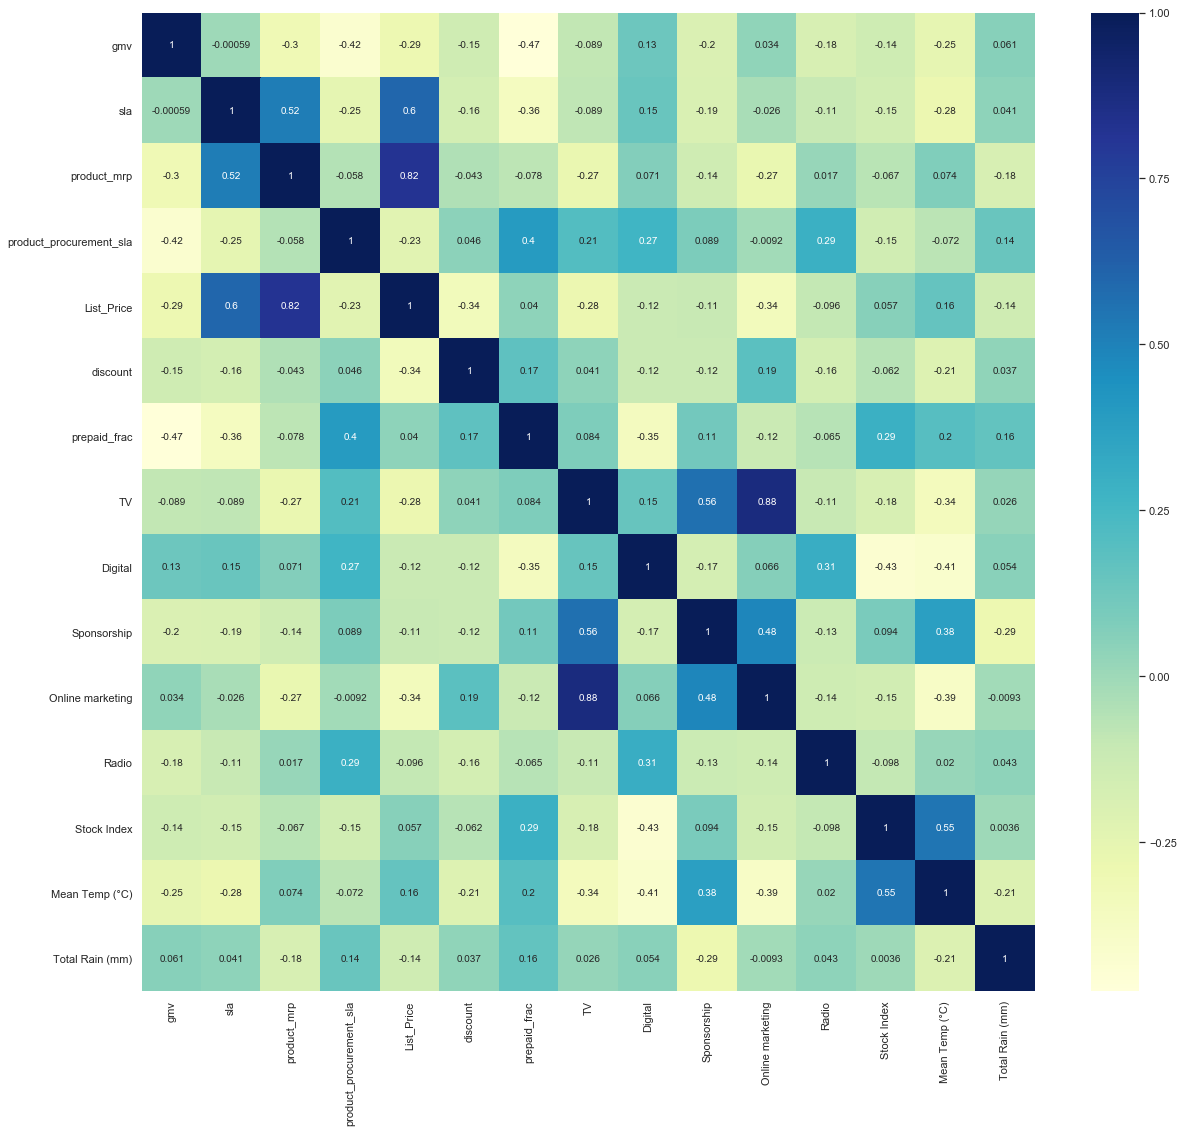

In [45]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ga_mult[numeric_variables_ga_mult].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [46]:
### Dropping corelated column and flag columns
### TV is highly correlated to Online marketing
### List_price is correlated to porduct_mrp
df_ga_mult.drop(['TV', 'sale_day_flag', 'List_Price'], axis = 1, inplace = True)

In [47]:
# Split the dataset into  test and train
y = df_ga_mult.pop('gmv')
X = df_ga_mult

X_train_ga_mult, X_test_ga_mult, y_train_ga_mult, y_test_ga_mult = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

### Performing RFE with 5 features

In [48]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ga_mult, y_train_ga_mult)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False  True  True  True  True False False False False False  True False]
[2 1 1 1 1 5 8 4 3 7 1 6]


In [49]:
list(zip(X_train_ga_mult.columns,rfe.support_,rfe.ranking_))

[('sla', False, 2),
 ('product_mrp', True, 1),
 ('product_procurement_sla', True, 1),
 ('discount', True, 1),
 ('prepaid_frac', True, 1),
 ('Digital', False, 5),
 ('Sponsorship', False, 8),
 ('Online marketing', False, 4),
 ('Radio', False, 3),
 ('Stock Index', False, 7),
 ('Mean Temp (°C)', True, 1),
 ('Total Rain (mm)', False, 6)]

In [50]:
# Subset the features selected by rfe
col = X_train_ga_mult.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_rfe = X_train_ga_mult[col]

# Add a constant to the model
X_rfe = sm.add_constant(X_rfe)

In [51]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ga_mult, X_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     7.510
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.61e-05
Time:                        14:29:22   Log-Likelihood:                -94.209
No. Observations:                  50   AIC:                             200.4
Df Residuals:                      44   BIC:                             211.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [52]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.47000
4,prepaid_frac,1.34000
2,product_procurement_sla,1.21000
5,Mean Temp (°C),1.14000
3,discount,1.11000
1,product_mrp,1.01000


In [53]:
# Dropping Radio as it has high p-value
col = col.drop('discount', 1)

In [54]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ga_mult[col])

lm2 = sm.OLS(y_train_ga_mult, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     9.096
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.79e-05
Time:                        14:29:24   Log-Likelihood:                -94.821
No. Observations:                  50   AIC:                             199.6
Df Residuals:                      45   BIC:                             209.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.36000
3,prepaid_frac,1.26000
2,product_procurement_sla,1.21000
4,Mean Temp (°C),1.07000
1,product_mrp,1.01000


In [56]:
# Dropping discount as it has high p-value
col = col.drop('Mean Temp (°C)', 1)

In [57]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ga_mult[col])

lm3 = sm.OLS(y_train_ga_mult, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.74e-05
Time:                        14:29:25   Log-Likelihood:                -96.317
No. Observations:                  50   AIC:                             200.6
Df Residuals:                      46   BIC:                             208.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [58]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.91000
2,product_procurement_sla,1.18000
3,prepaid_frac,1.18000
1,product_mrp,1.01000


In [59]:
# Predictions

X_test_new = X_test_ga_mult[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ga_mult))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ga_mult)**2)

print(RMSE)
print(MSE)

0.556694556914579
0.3099088296983195


#### For Multiplicative model we are getting R-Square of .413 and Adj. R-Square .375, RMSE = .557 and MSE = .309 

### Creating Distributed Lag Model

In [60]:
# We would read the file created for adstock for distributed lag model

df_ga_lagged = pd.read_csv('df_ga_weekly_adstock.csv', na_values=['', ' '])
df_ga_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
0,27,39388.00000,32.73990,2.81250,2231.78400,2.58231,1219.20705,25.28299,1,1,...,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000,54.00000,1177.00000,19.36000,0.00000
1,28,2746914.78403,3126.16969,5.32018,1533.94630,2.97226,876.96472,39.17852,0,0,...,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000,54.00000,1177.00000,20.10000,4.41667
2,29,2334009.14322,2893.38940,5.25600,1432.83347,2.52241,815.49195,40.96207,1,1,...,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000,54.00000,1177.00000,23.18333,1.40000
3,30,2655663.80671,2655.59133,5.30934,1814.44341,2.35943,1004.45791,35.97058,0,0,...,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000,54.00000,1177.00000,23.06000,0.90000
4,31,1930592.56805,1911.01296,5.54914,2728.27710,2.58343,1012.74625,41.10291,1,1,...,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000,55.42857,1185.28571,24.56667,4.63333


In [61]:
# Lets take lag for 2 weeks for some variables
cols = ['gmv', 'product_mrp', 'sla']

for col in cols:
    df_ga_lagged[col + '_lag_1'] = df_ga_lagged[col].shift(1)
    df_ga_lagged[col + '_lag_2'] = df_ga_lagged[col].shift(2)

In [62]:
# Creating moving average for few columns 

cols = ['List_Price', 'discount']
for col in cols:
    df_ga_lagged[col + '_ma_2'] = df_ga_lagged[col].rolling(window=2).mean()
    df_ga_lagged[col + '_ma_3'] = df_ga_lagged[col].rolling(window=3).mean()

In [63]:
df_ga_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,27,39388.00000,32.73990,2.81250,2231.78400,2.58231,1219.20705,25.28299,1,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,2746914.78403,3126.16969,5.32018,1533.94630,2.97226,876.96472,39.17852,0,0,...,39388.00000,nan,2231.78400,nan,2.81250,nan,1048.08588,nan,32.23076,nan
2,29,2334009.14322,2893.38940,5.25600,1432.83347,2.52241,815.49195,40.96207,1,1,...,2746914.78403,39388.00000,1533.94630,2231.78400,5.32018,2.81250,846.22833,970.55457,40.07030,35.14120
3,30,2655663.80671,2655.59133,5.30934,1814.44341,2.35943,1004.45791,35.97058,0,0,...,2334009.14322,2746914.78403,1432.83347,1533.94630,5.25600,5.32018,909.97493,898.97152,38.46632,38.70372
4,31,1930592.56805,1911.01296,5.54914,2728.27710,2.58343,1012.74625,41.10291,1,1,...,2655663.80671,2334009.14322,1814.44341,1432.83347,5.30934,5.25600,1008.60208,944.23204,38.53675,39.34519


In [64]:
### Dropping product subcategory and week_number
df_ga_lagged.drop(['week_number'], axis = 1, inplace = True)

In [65]:
# Replacing the NaN values
df_ga_lagged=df_ga_lagged.replace(np.nan, 0)

In [66]:
df_ga_lagged.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,39388.00000,32.73990,2.81250,2231.78400,2.58231,1219.20705,25.28299,1,1,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2746914.78403,3126.16969,5.32018,1533.94630,2.97226,876.96472,39.17852,0,0,0.26452,...,39388.00000,0.00000,2231.78400,0.00000,2.81250,0.00000,1048.08588,0.00000,32.23076,0.00000
2,2334009.14322,2893.38940,5.25600,1432.83347,2.52241,815.49195,40.96207,1,1,0.23969,...,2746914.78403,39388.00000,1533.94630,2231.78400,5.32018,2.81250,846.22833,970.55457,40.07030,35.14120
3,2655663.80671,2655.59133,5.30934,1814.44341,2.35943,1004.45791,35.97058,0,0,0.23020,...,2334009.14322,2746914.78403,1432.83347,1533.94630,5.25600,5.32018,909.97493,898.97152,38.46632,38.70372
4,1930592.56805,1911.01296,5.54914,2728.27710,2.58343,1012.74625,41.10291,1,1,0.20409,...,2655663.80671,2334009.14322,1814.44341,1432.83347,5.30934,5.25600,1008.60208,944.23204,38.53675,39.34519


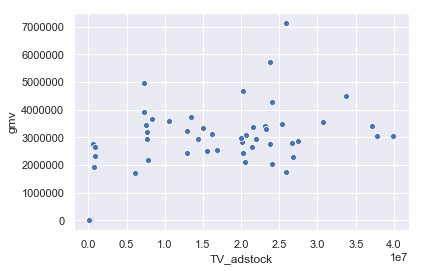

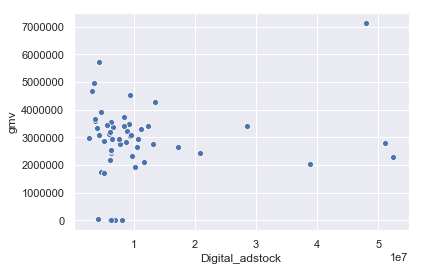

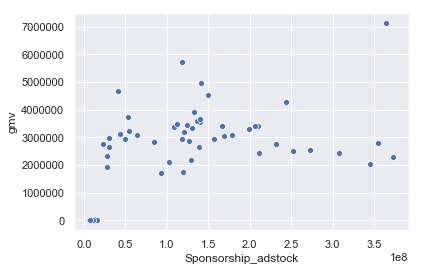

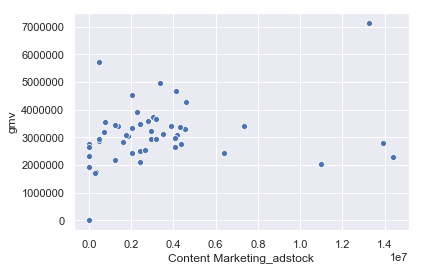

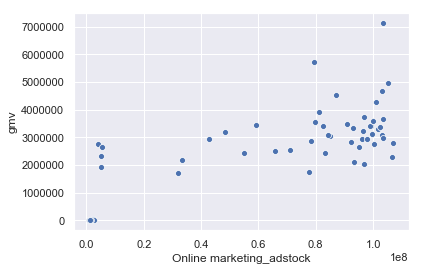

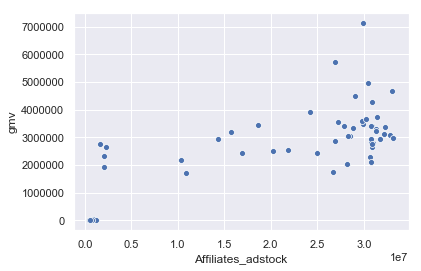

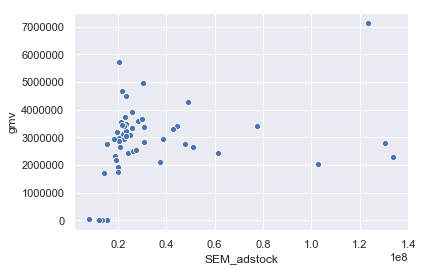

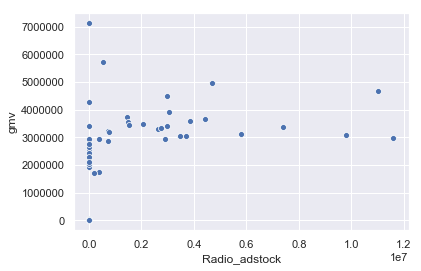

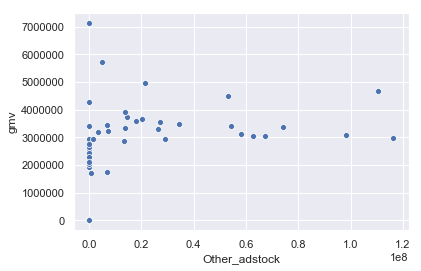

In [67]:
# Plotting the adstock vs gmv
cols = ['TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ga_lagged)
    plt.show()

In [68]:
df_ga_lagged.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [69]:
# Scaling the numeric columns except flag columns
numeric_variables_ga = ['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3']

In [70]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ga_lagged[numeric_variables_ga] = scaler.fit_transform(df_ga_lagged[numeric_variables_ga])

In [71]:
# Copying the dataframe to be used for distributed lag multiplicative model.
df_ga_dist_mult = df_ga_lagged.copy()

In [72]:
# Copying the dataframe to be used for koyck model
df_ga_koyck = df_ga_lagged.copy()

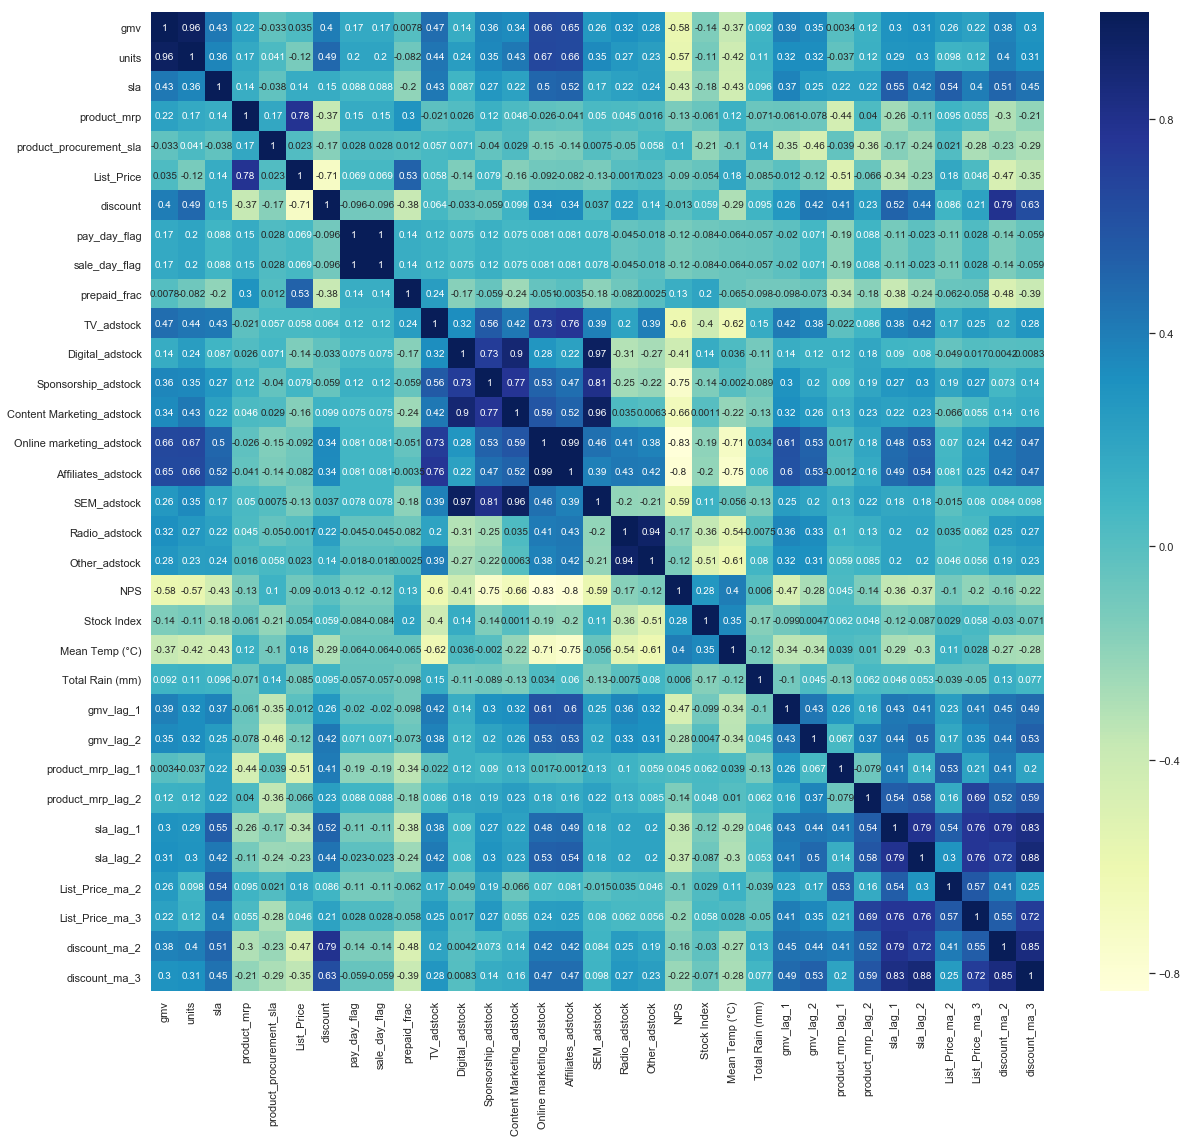

In [73]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ga_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [74]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 3. Digital, Content Marketing and SEM have high corelation. We would drop Digital and SEM.
# 4. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 5. Radio and Other have high corealtion. We would drop Other.
# 6. NPS have high negative colinearity with Online marketing. So, we would drop NPS.
# 7. gmv and units has high correlation So we would drop units.
# 8. Sponsorship adstock has high correlation with SEM adstock.
# 9. Discount moving averages are highly corelated. Hence dropping 1.



df_ga_lagged.drop(['pay_day_flag', 'product_mrp', 'units','Digital_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'NPS' , 'discount_ma_3'], axis = 1, inplace = True)

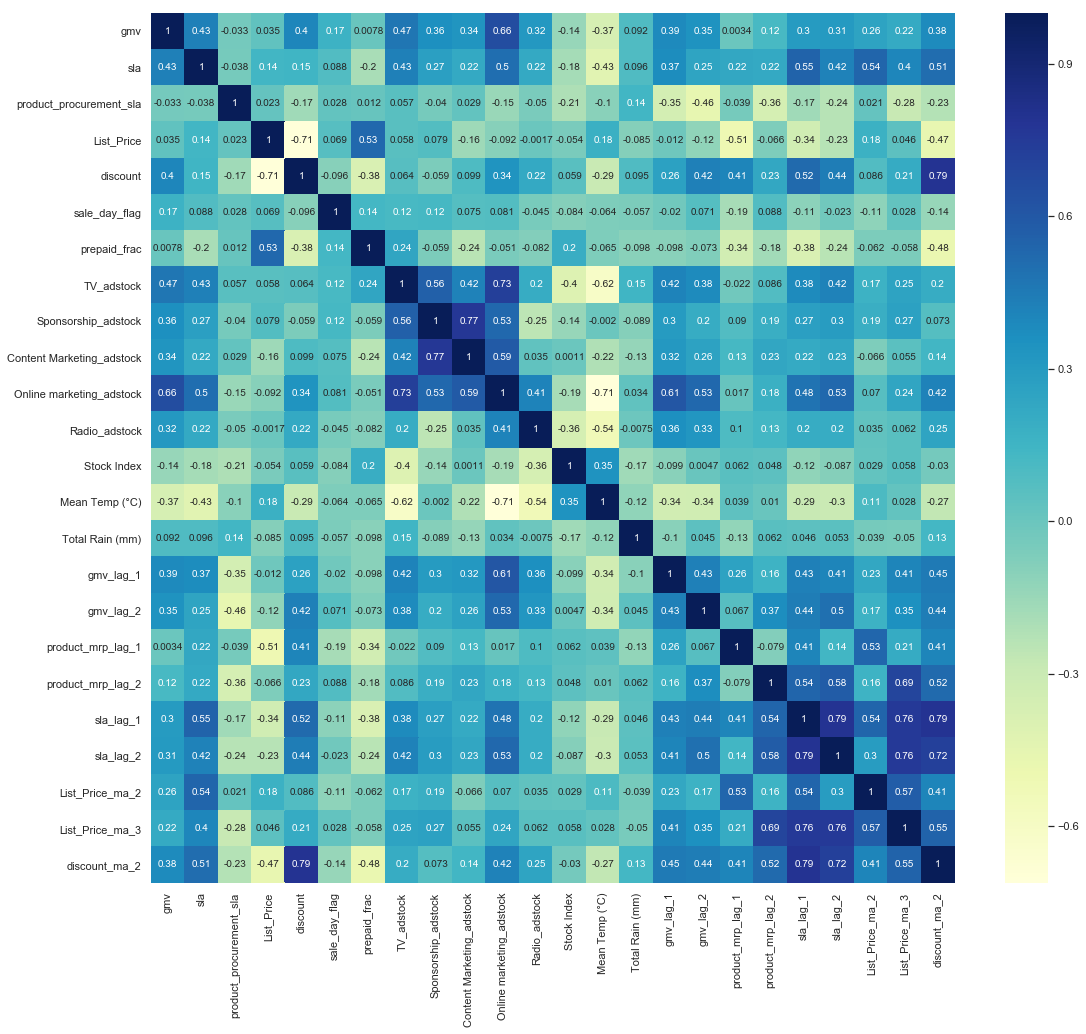

In [75]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ga_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [76]:
# Split the dataset into  test and train
y = df_ga_lagged.pop('gmv')
X = df_ga_lagged

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=100)

### Building first model using RFE

In [77]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ga, y_train_ga)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False False False  True False False False False False  True False False
 False False False False  True False  True False  True False False]
[10 18  6  1 19 11 17  8  5  1 14  9  7 16 15  4  1 12  1 13  1  3  2]


In [78]:
list(zip(X_train_ga.columns,rfe.support_,rfe.ranking_))

[('sla', False, 10),
 ('product_procurement_sla', False, 18),
 ('List_Price', False, 6),
 ('discount', True, 1),
 ('sale_day_flag', False, 19),
 ('prepaid_frac', False, 11),
 ('TV_adstock', False, 17),
 ('Sponsorship_adstock', False, 8),
 ('Content Marketing_adstock', False, 5),
 ('Online marketing_adstock', True, 1),
 ('Radio_adstock', False, 14),
 ('Stock Index', False, 9),
 ('Mean Temp (°C)', False, 7),
 ('Total Rain (mm)', False, 16),
 ('gmv_lag_1', False, 15),
 ('gmv_lag_2', False, 4),
 ('product_mrp_lag_1', True, 1),
 ('product_mrp_lag_2', False, 12),
 ('sla_lag_1', True, 1),
 ('sla_lag_2', False, 13),
 ('List_Price_ma_2', True, 1),
 ('List_Price_ma_3', False, 3),
 ('discount_ma_2', False, 2)]

In [79]:
# Subset the features selected by rfe1
col = X_train_ga.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ga[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ga, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     16.36
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.21e-09
Time:                        14:29:37   Log-Likelihood:                 40.876
No. Observations:                  50   AIC:                            -69.75
Df Residuals:                      44   BIC:                            -58.28
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.54000
4,sla_lag_1,2.57000
5,List_Price_ma_2,2.12000
1,discount,1.85000
3,product_mrp_lag_1,1.80000
2,Online marketing_adstock,1.49000


In [82]:
# Predictions

X_test_new = X_test_ga[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ga))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ga)**2)

print(RMSE)
print(MSE)
r2_score(y_test_ga, y_pred)

0.12997747889093758
0.016894145018844127


0.6596310029514961

#### Distributed lag model has R-Square = .65, Adjusted R-Square= .61, RMSE = 0.129 and MSE = 0.016.

### Koyck Model

In [83]:
# Reading the dataset created above
df_ga_koyck.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00547,0.00285,0.00000,0.79018,0.61846,1.00000,0.00000,1,1,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.38481,0.28086,0.70203,0.49527,0.84129,0.66568,0.49246,0,0,0.26452,...,0.00552,0.00000,0.81802,0.00000,0.44052,0.00000,1.00000,0.00000,0.65240,0.00000
2,0.32696,0.25994,0.68406,0.45254,0.58423,0.60563,0.55567,1,1,0.23969,...,0.38484,0.00552,0.56224,0.81802,0.83329,0.44052,0.80740,0.98366,0.81109,0.72110
3,0.37202,0.23857,0.69899,0.61381,0.49110,0.79022,0.37877,0,0,0.23020,...,0.32699,0.38484,0.52518,0.56224,0.82324,0.83329,0.86823,0.91111,0.77862,0.79421
4,0.27043,0.17165,0.76612,1.00000,0.61910,0.79832,0.56066,1,1,0.20409,...,0.37205,0.32699,0.66505,0.52518,0.83159,0.82324,0.96233,0.95698,0.78004,0.80737


In [84]:
df_ga_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [85]:
# Let's drop all the lag and moving averages except gmv_lag1 columns which are not used in koyck models

df_ga_koyck.drop(['gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'], axis = 1, inplace = True)

In [86]:
df_ga_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1'],
      dtype='object')

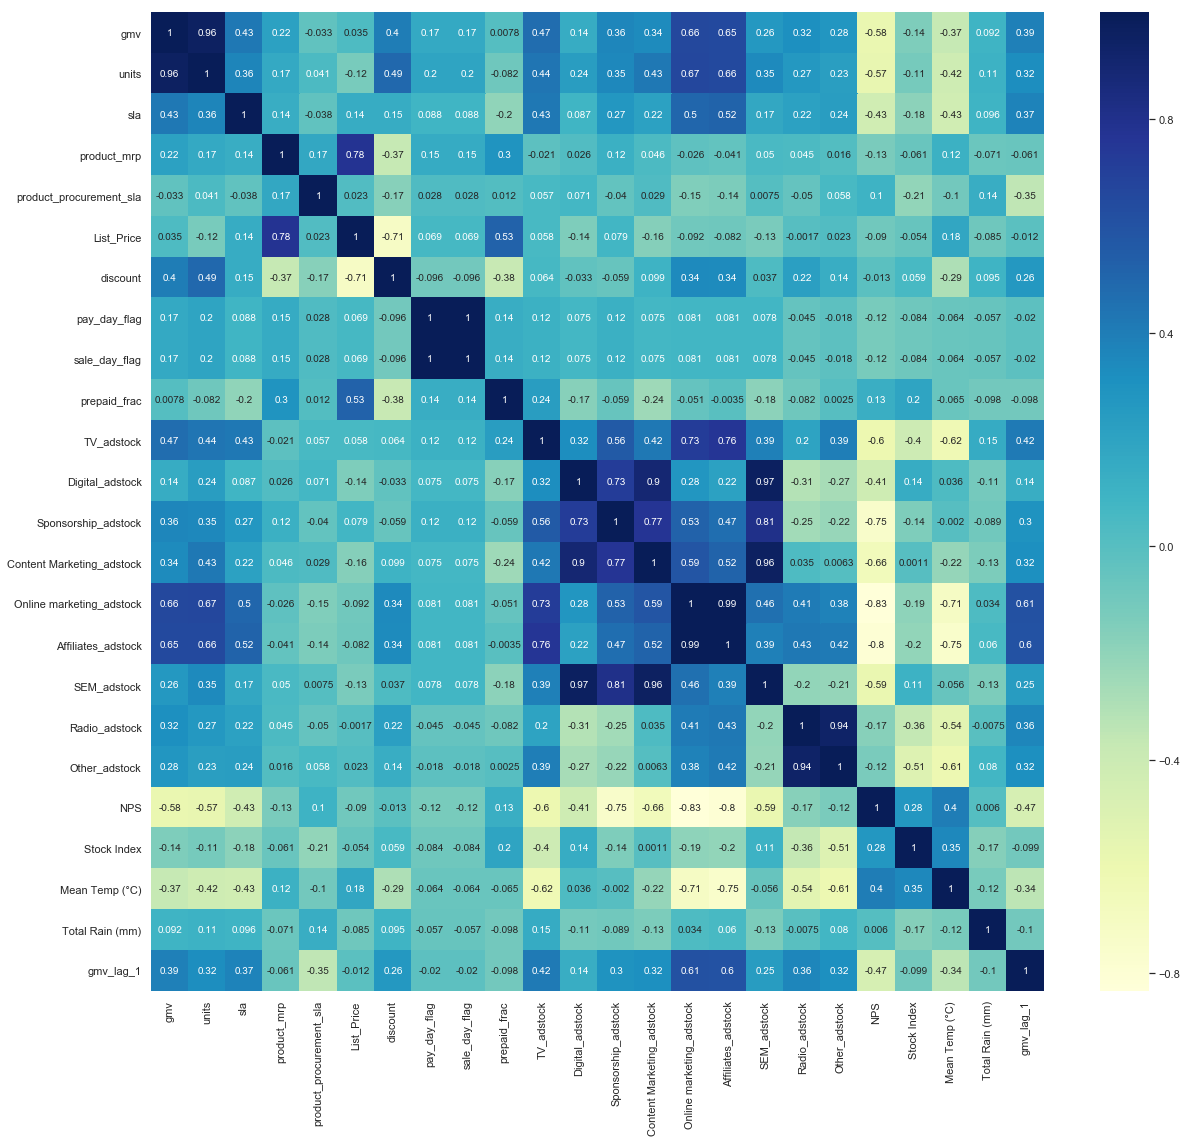

In [87]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ga_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [88]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 3. Digital, Content Marketing and SEM have high corelation. We would drop Digital and SEM.
# 4. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 5. Radio and Other have high corealtion. We would drop Other.
# 6. NPS have high negative colinearity with Online marketing. So, we would drop NPS.
# 7. gmv and units has high correlation So we would drop units.
# 8. Sponsorship adstock has high correlation with SEM adstock.
# 9. Discount moving averages are highly corelated. Hence dropping 1.



df_ga_koyck.drop(['pay_day_flag', 'product_mrp', 'units','Digital_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'NPS' ], axis = 1, inplace = True)

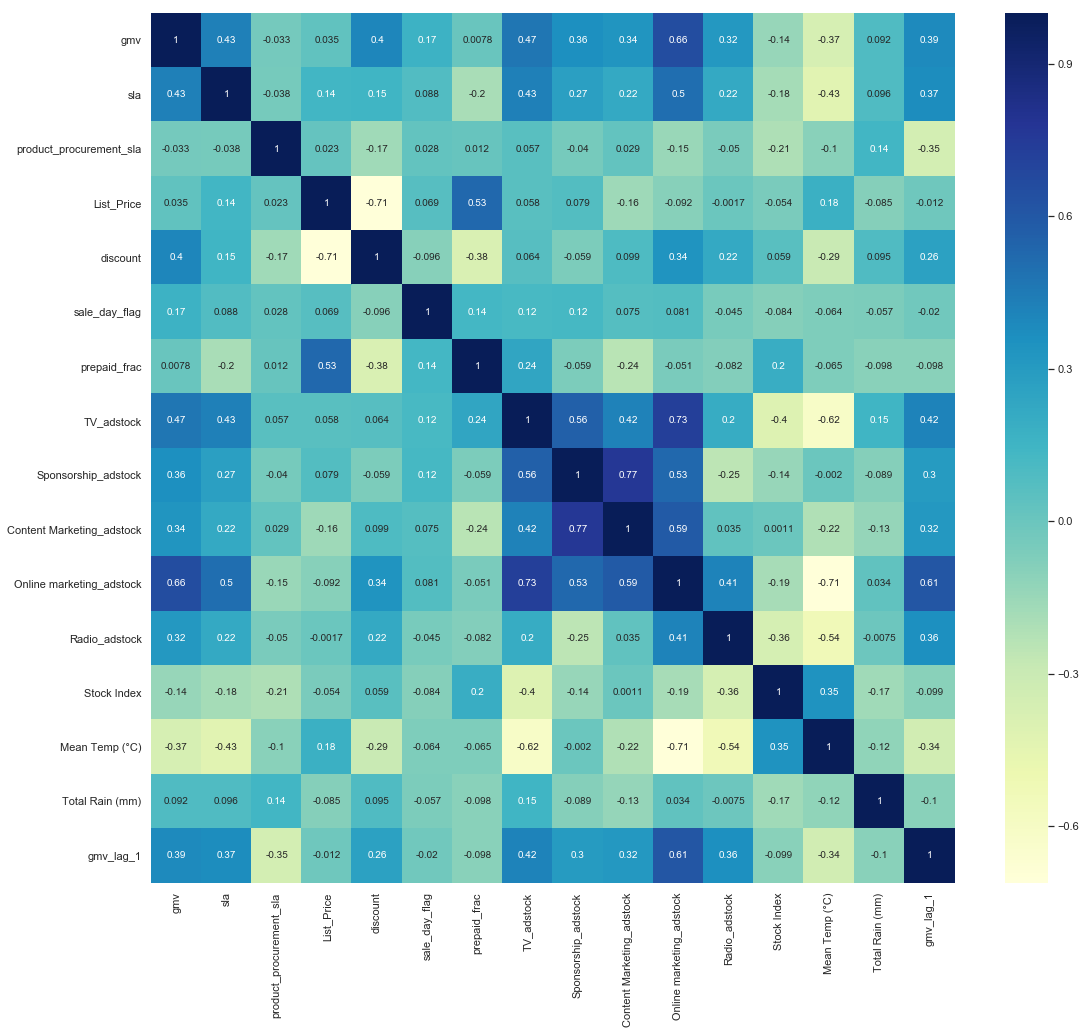

In [89]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ga_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [90]:
# Split the dataset into  test and train
y = df_ga_koyck.pop('gmv')
X = df_ga_koyck

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

### Building first model using RFE

In [91]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ga, y_train_ga)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False  True  True  True False False False False False  True False False
  True False False]
[ 4  1  1  1  6  3 10 11  9  1  5  8  1  7  2]


In [92]:
list(zip(X_train_ga.columns,rfe.support_,rfe.ranking_))

[('sla', False, 4),
 ('product_procurement_sla', True, 1),
 ('List_Price', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', False, 6),
 ('prepaid_frac', False, 3),
 ('TV_adstock', False, 10),
 ('Sponsorship_adstock', False, 11),
 ('Content Marketing_adstock', False, 9),
 ('Online marketing_adstock', True, 1),
 ('Radio_adstock', False, 5),
 ('Stock Index', False, 8),
 ('Mean Temp (°C)', True, 1),
 ('Total Rain (mm)', False, 7),
 ('gmv_lag_1', False, 2)]

In [93]:
## Check the summary of this model using `statsmodels`.
# Subset the features selected by rfe1
col = X_train_ga.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ga[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [94]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ga, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.30e-09
Time:                        14:29:43   Log-Likelihood:                 39.229
No. Observations:                  50   AIC:                            -66.46
Df Residuals:                      44   BIC:                            -54.99
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [95]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,162.32000
3,discount,2.41000
4,Online marketing_adstock,2.33000
2,List_Price,2.22000
5,Mean Temp (°C),2.22000
1,product_procurement_sla,1.14000


In [96]:
# Dropping Mean Temp (°C) as it has high p-value
col = col.drop('Mean Temp (°C)', 1)

In [97]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ga[col])

lm2 = sm.OLS(y_train_ga, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     19.39
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.47e-09
Time:                        14:29:43   Log-Likelihood:                 37.302
No. Observations:                  50   AIC:                            -64.60
Df Residuals:                      45   BIC:                            -55.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,127.97000
3,discount,2.41000
2,List_Price,2.18000
4,Online marketing_adstock,1.17000
1,product_procurement_sla,1.05000


In [99]:
# Dropping product_procurement_sla as it has high p-value
col = col.drop('product_procurement_sla', 1)

In [100]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ga[col])

lm3 = sm.OLS(y_train_ga, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.42e-09
Time:                        14:29:44   Log-Likelihood:                 36.003
No. Observations:                  50   AIC:                            -64.01
Df Residuals:                      46   BIC:                            -56.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.17000
2,discount,2.36000
1,List_Price,2.16000
3,Online marketing_adstock,1.16000


In [102]:
# Predictions

X_test_new = X_test_ga[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ga))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ga)**2)

print(RMSE)
print(MSE)

0.14922379018047288
0.022267739555825793


#### Koyck Model is giving us R-square of .613 and adjusted R-square of .588.

### Distributed Lag Multiplicative Model

In [103]:
# Reading the dataset created above
df_ga_dist_mult.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00547,0.00285,0.00000,0.79018,0.61846,1.00000,0.00000,1,1,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.38481,0.28086,0.70203,0.49527,0.84129,0.66568,0.49246,0,0,0.26452,...,0.00552,0.00000,0.81802,0.00000,0.44052,0.00000,1.00000,0.00000,0.65240,0.00000
2,0.32696,0.25994,0.68406,0.45254,0.58423,0.60563,0.55567,1,1,0.23969,...,0.38484,0.00552,0.56224,0.81802,0.83329,0.44052,0.80740,0.98366,0.81109,0.72110
3,0.37202,0.23857,0.69899,0.61381,0.49110,0.79022,0.37877,0,0,0.23020,...,0.32699,0.38484,0.52518,0.56224,0.82324,0.83329,0.86823,0.91111,0.77862,0.79421
4,0.27043,0.17165,0.76612,1.00000,0.61910,0.79832,0.56066,1,1,0.20409,...,0.37205,0.32699,0.66505,0.52518,0.83159,0.82324,0.96233,0.95698,0.78004,0.80737


In [104]:
df_ga_dist_mult.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [105]:
# Taking natural log

for col in list(df_ga_dist_mult.columns):
    df_ga_dist_mult[col] = np.log(df_ga_dist_mult[col])

In [106]:
df_ga_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,...,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.07920,-1.43310,-0.29705,-0.79015,-0.71176,-0.61864,-0.61582,nan,nan,-1.77782,...,-1.07910,-1.07910,-0.64198,-0.64402,-0.15523,-0.15523,-0.32992,-0.25630,-0.18886,-0.16703
50%,-0.88559,-1.13424,-0.19538,-0.66491,-0.57318,-0.47121,-0.42895,nan,nan,-1.69412,...,-0.88552,-0.88552,-0.54686,-0.55310,-0.10458,-0.10458,-0.25228,-0.19855,-0.12829,-0.11740
75%,-0.73959,-0.92766,-0.15071,-0.56585,-0.49908,-0.33387,-0.29551,0.00000,0.00000,-1.53786,...,-0.73954,-0.73954,-0.46966,-0.47064,-0.08151,-0.08151,-0.15106,-0.10002,-0.08851,-0.07134
max,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000


In [107]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ga_dist_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ga_dist_mult.fillna(0,inplace=True)

In [108]:
df_ga_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,...,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,-1.39201,-1.59825,-0.28021,-0.65950,-0.60339,-0.48626,-0.46247,0.00000,0.00000,-1.40806,...,-1.33991,-1.31300,-0.54735,-0.53922,-0.13211,-0.12757,-0.23999,-0.17631,-0.13622,-0.11774
std,2.13009,1.88639,0.40129,0.29266,0.25157,0.27725,0.24527,0.00000,0.00000,0.59959,...,1.88172,1.89064,0.27467,0.28439,0.11917,0.11954,0.12964,0.10960,0.08878,0.07835
min,-12.31514,-9.31714,-2.94712,-1.94899,-1.26561,-1.83437,-0.98922,0.00000,0.00000,-1.89857,...,-9.81222,-9.81222,-2.01978,-2.01978,-0.81981,-0.81981,-0.55094,-0.40500,-0.42710,-0.32697
25%,-1.06984,-1.40641,-0.29701,-0.78186,-0.71111,-0.59075,-0.61356,0.00000,0.00000,-1.75254,...,-1.06974,-1.03998,-0.63577,-0.63577,-0.15521,-0.15297,-0.32671,-0.25103,-0.18799,-0.15432
50%,-0.87365,-1.11910,-0.18897,-0.66363,-0.57311,-0.46081,-0.42648,0.00000,0.00000,-1.67361,...,-0.87358,-0.85463,-0.54587,-0.54587,-0.10130,-0.10087,-0.22159,-0.19071,-0.12203,-0.11094
75%,-0.73042,-0.92262,-0.14964,-0.55600,-0.49691,-0.32744,-0.28693,0.00000,0.00000,-1.46879,...,-0.73036,-0.71987,-0.46189,-0.46189,-0.08095,-0.07665,-0.14981,-0.09310,-0.07322,-0.06357
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [109]:
# Dropping flag variables after taking log
df_ga_dist_mult.drop(['pay_day_flag', 'sale_day_flag' ], axis = 1, inplace = True)

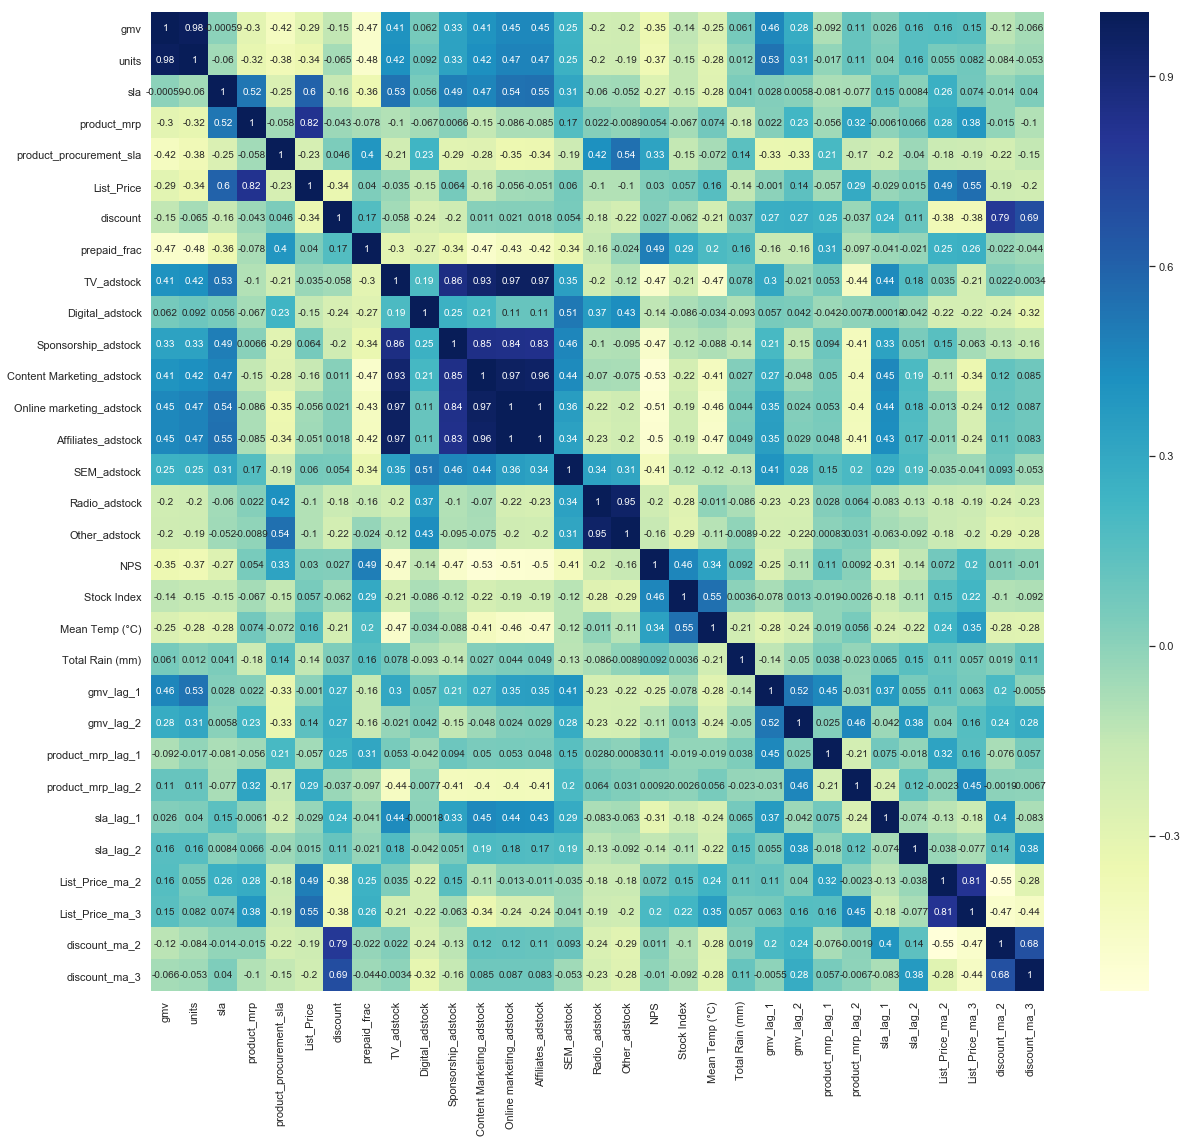

In [110]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ga_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [111]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. TV Adstock, Digital, Sponsorship, Content Marketing and Affiliate adstock have high corelation.
# 3. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 4. Radio and Other have high corealtion. We would drop Other.
# 5. gmv and units has high correlation So we would drop units.
# 6. List price moving averages have high corelation.



df_ga_dist_mult.drop([ 'product_mrp', 'units','Digital_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'TV_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock', 'List_Price_ma_3' ], axis = 1, inplace = True)

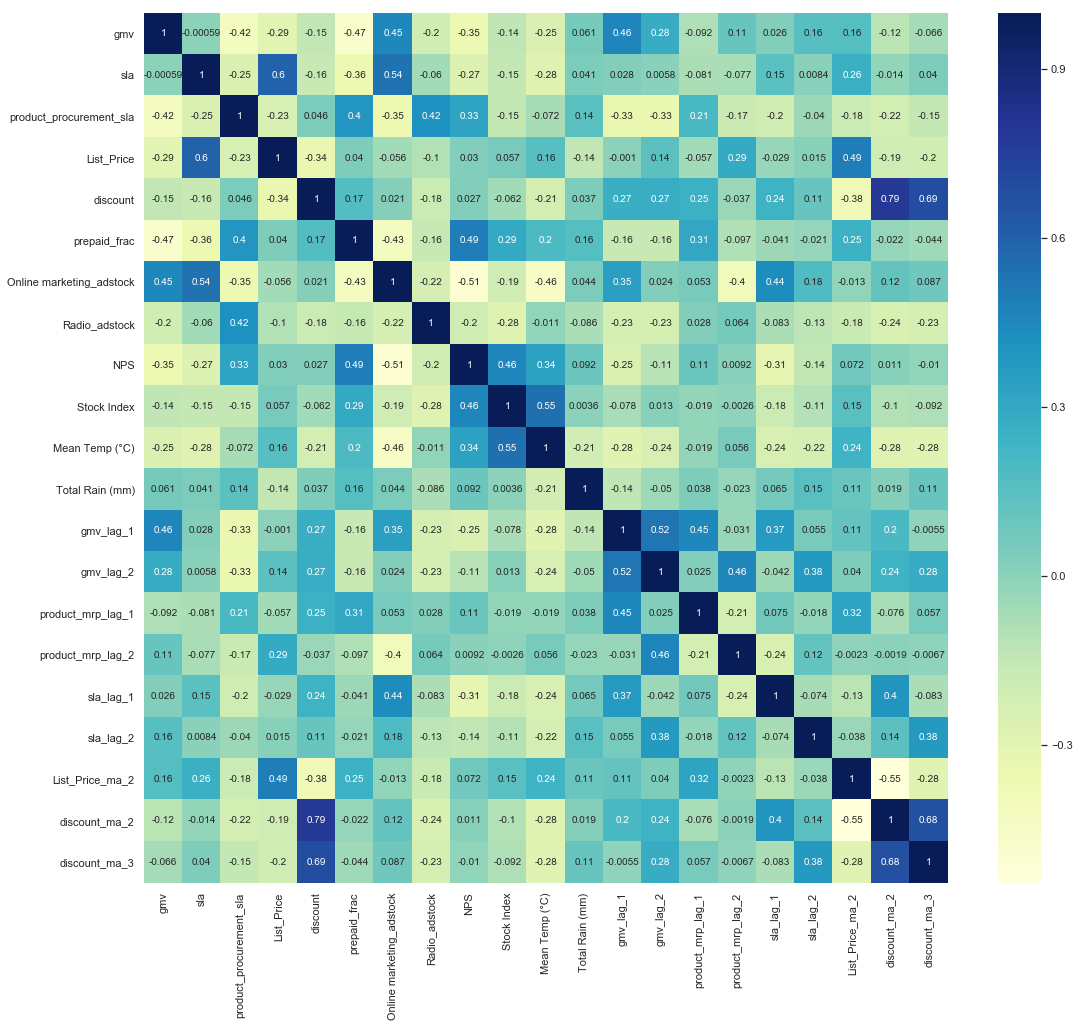

In [112]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ga_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [113]:
# Split the dataset into  test and train
y = df_ga_dist_mult.pop('gmv')
X = df_ga_dist_mult

X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

### Building first model using RFE

In [114]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ga, y_train_ga)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False False  True False  True False False False False False False False
 False False  True  True False  True False False]
[ 4  7  1  6  1  5 12 14 13 15 16  8 11  3  1  1 10  1  2  9]


In [115]:
list(zip(X_train_ga.columns,rfe.support_,rfe.ranking_))

[('sla', False, 4),
 ('product_procurement_sla', False, 7),
 ('List_Price', True, 1),
 ('discount', False, 6),
 ('prepaid_frac', True, 1),
 ('Online marketing_adstock', False, 5),
 ('Radio_adstock', False, 12),
 ('NPS', False, 14),
 ('Stock Index', False, 13),
 ('Mean Temp (°C)', False, 15),
 ('Total Rain (mm)', False, 16),
 ('gmv_lag_1', False, 8),
 ('gmv_lag_2', False, 11),
 ('product_mrp_lag_1', False, 3),
 ('product_mrp_lag_2', True, 1),
 ('sla_lag_1', True, 1),
 ('sla_lag_2', False, 10),
 ('List_Price_ma_2', True, 1),
 ('discount_ma_2', False, 2),
 ('discount_ma_3', False, 9)]

In [116]:
## Check the summary of this model using `statsmodels`.
# Subset the features selected by rfe1
col = X_train_ga.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ga[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [117]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ga, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     13.60
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.92e-08
Time:                        14:29:52   Log-Likelihood:                -86.276
No. Observations:                  50   AIC:                             184.6
Df Residuals:                      44   BIC:                             196.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7476      0.82

In [118]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.03000
1,List_Price,1.50000
5,List_Price_ma_2,1.46000
3,product_mrp_lag_2,1.23000
4,sla_lag_1,1.10000
2,prepaid_frac,1.08000


In [119]:
# Dropping sla_lag_1 as it has high p-value
col = col.drop('sla_lag_1', 1)

In [120]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ga[col])

lm2 = sm.OLS(y_train_ga, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.80e-08
Time:                        14:29:52   Log-Likelihood:                -87.359
No. Observations:                  50   AIC:                             184.7
Df Residuals:                      45   BIC:                             194.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.2801      0.73

In [121]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.56000
1,List_Price,1.47000
4,List_Price_ma_2,1.42000
3,product_mrp_lag_2,1.14000
2,prepaid_frac,1.08000


In [122]:
# Predictions

X_test_new = X_test_ga[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm2.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ga))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ga)**2)

print(RMSE)
print(MSE)

0.35127452149652005
0.12339378945260915


#### Distributed Multiplicative Lag Model is giving R-Square = .59, Adjusted R-Square=.553, RMSE = .351 and MSE = 0.123.

### Conclusions :

1. Both the multiplicative models are giving decent performance but none of the Marketing Spends or Adstock variables.
2. Distributed lag and Koyck model have better performance than the Linear model.
3. Distributed Lag, Koyck, and Linear model points to almost same predictor variables.
4. We can see that List Price, Discount and Online Marketing Adstock are the variables given by 3 models for predicting GMV.
5. Multiplicative models are giving predictor variables as Prepaid Fraction, MRP and List Price.
